In [142]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from data_loading import read_hackathon_data

from metrics.metrics_time import TimeMetrics

lop = read_hackathon_data(Path("data_config.yaml"))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
TM = TimeMetrics()
metrics = TM.calculate_metrics(lop)
metrics.head()

,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,...,expert,user_id,result,execution_time,execution_result,edited_time,state_time,next_action_time,state_time_dt,interruptions
14821,14,10.82.188.240,2023-05-06 08:31:14.874000+00:00,a3faa4bd-d034-41dc-a1a0-b2ac15757097,eeedb543-cbc3-4e59-8e63-511e29518da4,task1.ipynb,execute,cc973487bf764ec49c8636c0f02f886c,0.0,code,...,False,student_8,,2023-05-06T08:31:15.115Z,stream,None,2023-05-06 08:31:15.115000+00:00,0.009,0.241,1
13500,13,10.82.188.240,2023-05-06 08:31:14.883000+00:00,a3faa4bd-d034-41dc-a1a0-b2ac15757097,eeedb543-cbc3-4e59-8e63-511e29518da4,task1.ipynb,create,b96452a97f01456883542ea0ac111479,0.0,code,...,False,student_8,,None,ok,2023-05-06T08:39:45.591Z,2023-05-06 08:39:45.591000+00:00,0.232,510.708,22
14822,15,10.82.188.240,2023-05-06 08:31:15.115000+00:00,a3faa4bd-d034-41dc-a1a0-b2ac15757097,eeedb543-cbc3-4e59-8e63-511e29518da4,task1.ipynb,finished_execute,cc973487bf764ec49c8636c0f02f886c,1.0,code,...,False,student_8,stream,None,ok,None,NaT,20.814,NaN,0
16445,17,192.168.1.56,2023-05-06 08:31:35.929000+00:00,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,e4836a849dea49f1a753df2274fbdbc5,0.0,code,...,False,student_2,,2023-05-06T08:31:36.049Z,stream,None,2023-05-06 08:31:36.049000+00:00,0.015,0.120,1
15924,18,192.168.1.56,2023-05-06 08:31:35.944000+00:00,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,create,dbcf462e8f6c4e3a89c0d6d0d083c0b2,0.0,code,...,False,student_2,,None,ok,2023-05-06T08:37:46.346Z,2023-05-06 08:37:46.346000+00:00,0.105,370.402,13


# Execution time

In [146]:
metrics.notebook_name.unique()

array(['task1.ipynb', 'Untitled.ipynb', 'task2.ipynb', 'data.ipynb',
       'task2_nb.ipynb', 'task2-Copy1.ipynb', 'task2-Copy2.ipynb',
       'task2-Copy3.ipynb', 'task2-Copy4.ipynb', 'task2-Copy5.ipynb',
       'task2-final.ipynb'], dtype=object)

In [76]:
metrics.loc[metrics.event == 'execute', 'state_time_dt'].describe()

count    7881.000000
mean        9.985067
std        49.024056
min         0.008000
25%         0.053000
50%         0.258000
75%         2.233000
max       904.483000
Name: state_time_dt, dtype: float64

In [77]:
metrics.loc[metrics.event != 'execute', 'state_time_dt'].describe()

count     7264.000000
mean       527.049336
std       1677.947863
min          0.013000
25%          8.981500
50%         34.121500
75%        203.064500
max      16587.424000
Name: state_time_dt, dtype: float64

In [96]:
# task 1
sum_exec = metrics.loc[((metrics.event == 'execute') & (metrics.notebook_name == 'task1.ipynb')), :].groupby('kernel_id').state_time_dt.sum()
sum_non_exec = metrics.loc[(metrics.event != 'execute') & (metrics.notebook_name == 'task1.ipynb'), :].groupby('kernel_id').state_time_dt.sum()
sum_non_exec = sum_non_exec + 0.000001
sum_exec = sum_exec + 0.000001
(sum_exec / sum_non_exec).mean()

0.44631229644211823

In [97]:
# task 2
sum_exec = metrics.loc[((metrics.event == 'execute') & (metrics.notebook_name == 'task2.ipynb')), :].groupby('kernel_id').state_time_dt.sum()
sum_non_exec = metrics.loc[(metrics.event != 'execute') & (metrics.notebook_name == 'task2.ipynb'), :].groupby('kernel_id').state_time_dt.sum()
sum_non_exec = sum_non_exec + 0.000001
sum_exec = sum_exec + 0.000001
(sum_exec / sum_non_exec).mean()

0.2656383754035966

In [124]:
metrics = metrics[metrics.notebook_name.isin(['task1.ipynb', 'task2.ipynb'])]

In [125]:
metrics_long =  metrics.loc[:,['notebook_name','event','expert','next_action_time', 'interruptions', 'state_time_dt']]

In [126]:
metrics_long = metrics_long.melt(id_vars=['notebook_name','event','expert', 'state_time_dt'])

In [127]:
interruptions = metrics_long[(metrics_long.variable == 'interruptions')&(metrics_long.event == 'execute')]

# Action time

In [133]:
tips = sns.load_dataset("tips")

In [136]:
interruptions

,notebook_name,event,expert,state_time_dt,variable,value
16687,task1.ipynb,execute,False,0.241,interruptions,1.0
16690,task1.ipynb,execute,False,0.120,interruptions,1.0
16693,task1.ipynb,execute,False,0.337,interruptions,0.0
16695,task1.ipynb,execute,False,0.381,interruptions,0.0
16697,task1.ipynb,execute,False,NaN,interruptions,0.0
...,...,...,...,...,...,...
33362,task2.ipynb,execute,True,0.232,interruptions,0.0
33364,task2.ipynb,execute,True,0.027,interruptions,0.0
33366,task2.ipynb,execute,True,0.286,interruptions,0.0
33369,task2.ipynb,execute,True,0.285,interruptions,0.0


In [140]:
interruptions.columns

Index(['notebook_name', 'event', 'expert', 'state_time_dt', 'variable',
       'value'],
      dtype='object')

/Users/Sergey.Titov/Library/Caches/pypoetry/virtualenvs/jupyter-logs-analysis-OXQ8jfKU-py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


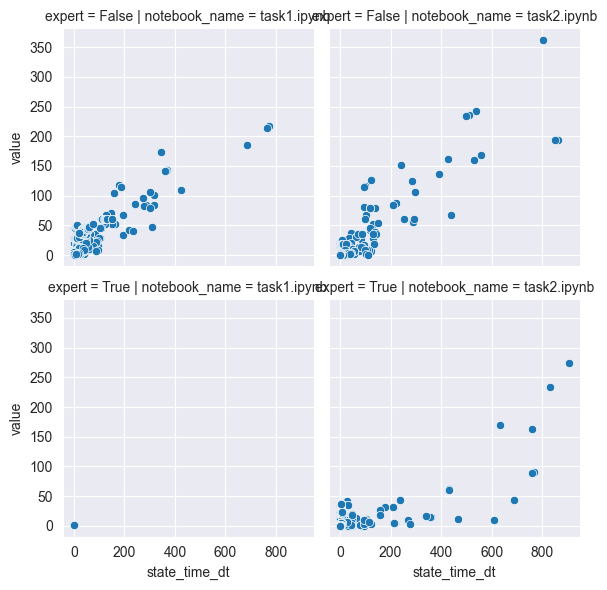

In [141]:
g = sns.FacetGrid(interruptions, col="notebook_name",  row="expert")
g.map(sns.scatterplot, "state_time_dt", "value")

In [80]:
metrics.loc[:, ['next_action_time', 'event']].groupby('event').describe()

next_action_time                                            \
                            count         mean            std    min    25%   
event                                                                         
create                     1729.0     6.194211      19.521560  0.002  0.335   
delete                      701.0  5161.480767  136436.062974  0.001  0.627   
execute                    8244.0     1.171614       7.279186  0.000  0.033   
finished_execute           8020.0   174.150959   15024.317580  0.000  0.397   

                                              
                     50%    75%          max  
event                                         
create            1.8930  5.585      403.926  
delete            1.9190  6.136  3612344.664  
execute           0.1015  0.469      370.665  
finished_execute  2.0170  5.822  1345494.187

In [81]:
metrics[(metrics.next_action_time > 60*5)]
# clean_metrics = metrics[~(metrics.state_time_dt > 60*100)]


,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,...,expert,user_id,result,execution_time,execution_result,edited_time,state_time,next_action_time,state_time_dt,interruptions
6762,14391,127.0.0.1,2023-05-06 18:09:12.295000+00:00,d1b59124-7511-469a-b777-449d4411363f,69be72c3-3883-4205-9a54-82d3daa35bd6,task2.ipynb,finished_execute,574a7283228344f2aeabd8a787513c60,15.0,code,...,False,student_0,stream,None,ok,None,NaT,1345494.187,NaN,0
5982,1185,172.25.68.33,2023-05-22 09:46:44.806000+00:00,0f54c11b-b98e-4f62-8882-df72cd2b3d13,232bcb48-7455-4109-9eeb-809649a6bedc,task2.ipynb,finished_execute,4baeea7bf21849bf8c479b3bc022b2dc,32.0,code,...,True,expert_3,execute_result,None,ok,2023-05-22T10:03:57.492Z,2023-05-22 10:03:57.492000+00:00,425.154,1032.686,85
13952,1188,None,2023-05-22 09:53:49.960000+00:00,af2e8588-a8b6-40f9-a053-316b93288f34,3179a989-9b41-49b9-84f8-5fe83a7c65bf,task2.ipynb,finished_execute,bf8dd30a31774ab1a6e212fcc2683f84,21.0,code,...,True,expert_4,stream,None,ok,None,NaT,339.418,NaN,0
2351,3896,172.25.68.33,2023-05-22 12:52:02.559000+00:00,d9f2175c-4007-49d2-89f4-8dacdd696f77,ced770f0-46bb-424a-a42a-3a2c718c85b1,task2-Copy3.ipynb,execute,192f8c2fbf584be0acc88a544da726e1,20.0,code,...,True,expert_3,,2023-05-22T12:58:13.224Z,stream,None,2023-05-22 12:58:13.224000+00:00,370.665,370.665,0
1401,4290,172.25.68.254,2023-05-22 13:21:59.093000+00:00,af2e8588-a8b6-40f9-a053-316b93288f34,3179a989-9b41-49b9-84f8-5fe83a7c65bf,task2.ipynb,delete,0eb1f205fed14bd3a03eba5d2959568f,NaN,code,...,True,expert_4,,None,ok,None,NaT,3612344.664,NaN,0
13844,3,178.221.250.186,2023-07-03 08:47:43.809000+00:00,b5ba1f4c-9687-4b0a-bc3f-94ca134343d7,fbb11760-eda3-4233-b800-12e732df766b,task2.ipynb,finished_execute,beaf4ab315504ab68a0b42925bb3b1d0,1.0,code,...,True,expert_2,error,None,ok,None,NaT,484.523,NaN,0
16405,1437,178.221.250.186,2023-07-03 11:06:51.503000+00:00,b5ba1f4c-9687-4b0a-bc3f-94ca134343d7,fbb11760-eda3-4233-b800-12e732df766b,task2.ipynb,create,e427c474483d49cfaf0520af3d346073,39.0,markdown,...,True,expert_2,,None,ok,None,NaT,351.202,NaN,0
3983,1959,178.221.250.186,2023-07-03 12:19:42.581000+00:00,b5ba1f4c-9687-4b0a-bc3f-94ca134343d7,fbb11760-eda3-4233-b800-12e732df766b,task2.ipynb,finished_execute,322d3645d098478084f35c839be52296,63.0,code,...,True,expert_2,execute_result,None,ok,None,NaT,2028.602,NaN,0
9,1964,178.221.250.186,2023-07-03 12:55:52.292000+00:00,b5ba1f4c-9687-4b0a-bc3f-94ca134343d7,fbb11760-eda3-4233-b800-12e732df766b,task2.ipynb,create,002d9cdeac8143f68327ca87b91b4e3a,50.0,code,...,True,expert_2,,None,ok,2023-07-03T13:02:36.218Z,2023-07-03 13:02:36.218000+00:00,403.926,403.926,0
3871,2524,178.221.250.186,2023-07-03 13:49:36.760000+00:00,b5ba1f4c-9687-4b0a-bc3f-94ca134343d7,fbb11760-eda3-4233-b800-12e732df766b,task2.ipynb,delete,30506d3f2fce44f18584f719e752d811,NaN,code,...,True,expert_2,,None,ok,None,NaT,749.882,NaN,0
